In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV



Memory Reduction

In [2]:
def reduce_memo(df):
    for col in df.columns:
        if df[col].dtype =="float64":
            df[col]=df[col].astype('float32')

        elif df[col].dtype==('int64'):
            df[col]=df[col].astype('int32')
    return df

LOAD THE DATA

In [3]:
departments= pd.read_csv("D:\DATASET\departments.csv")
orders=pd.read_csv("D:\DATASET\orders.csv")
order_product=pd.read_csv("D:\DATASET\order_products__prior.csv")
product=pd.read_csv("D:\DATASET\products.csv")
aisle=pd.read_csv("D:\DATASET/aisles.csv")


<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
C:\Users\owndi\AppData\Local\Temp\ipykernel_25692\1262068485.py:1: SyntaxWarning: invalid escape sequence '\D'
  departments= pd.read_csv("D:\DATASET\departments.csv")
C:\Users\owndi\AppData\Local\Temp\ipykernel_25692\1262068485.py:2: SyntaxWarning: invalid escape sequence '\D'
  orders=pd.read_csv("D:\DATASET\orders.csv")
C:\Users\owndi\AppData\Local\Temp\ipykernel_25692\1262068485.py:3: SyntaxWarning: invalid escape sequence '\D'
  order_product=pd.read_csv("D:\DATASET\order_products__prior.cs

In [4]:
orders= reduce_memo(orders)
departments=reduce_memo(departments)
order_product=reduce_memo(order_product)
product=reduce_memo(product)
aisle=reduce_memo(aisle)

Look at the Data

In [5]:
aisle

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [6]:
order_product.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


We will join our data into one df

In [5]:
complete_df=pd.merge(order_product,product,how='inner',on='product_id')
complete_df=pd.merge(complete_df,departments,how='inner',on='department_id')
complete_df=pd.merge(complete_df,aisle,how='inner',on='aisle_id')
complete_df=pd.merge(complete_df,orders,how='inner',on='order_id')
complete_df.head()
sample_df=complete_df.sample(200000,random_state=42)

EDA


Look at data

In [8]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int32  
 1   product_id              int32  
 2   add_to_cart_order       int32  
 3   reordered               int32  
 4   product_name            object 
 5   aisle_id                int32  
 6   department_id           int32  
 7   department              object 
 8   aisle                   object 
 9   user_id                 int32  
 10  eval_set                object 
 11  order_number            int32  
 12  order_dow               int32  
 13  order_hour_of_day       int32  
 14  days_since_prior_order  float16
dtypes: float16(1), int32(10), object(4)
memory usage: 2.2+ GB


Summary of Data

In [9]:
complete_df.describe()

c:\ProgramData\anaconda3\Lib\site-packages\pandas\core\nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
c:\ProgramData\anaconda3\Lib\site-packages\numpy\_core\_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\ProgramData\anaconda3\Lib\site-packages\pandas\core\nanops.py:731: RuntimeWarning: invalid value encountered in scalar divide
  the_mean = the_sum / count if count > 0 else np.nan
c:\ProgramData\anaconda3\Lib\site-packages\pandas\core\nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)


,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,30356421.0
mean,1.710749e+06,2.557634e+04,8.351076e+00,5.896975e-01,7.121430e+01,9.921906e+00,1.029372e+05,1.714205e+01,2.738818e+00,1.342498e+01,NaN
std,9.873007e+05,1.409669e+04,7.126671e+00,4.918886e-01,3.820302e+01,6.281156e+00,5.946648e+04,1.753504e+01,2.090049e+00,4.246365e+00,0.0
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,8.559430e+05,1.353000e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,5.142100e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.0
50%,1.711048e+06,2.525600e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,1.026110e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.0
75%,2.565514e+06,3.793500e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.543910e+05,2.400000e+01,5.000000e+00,1.600000e+01,15.0
max,3.421083e+06,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,30.0


Distrubution of days since prior order

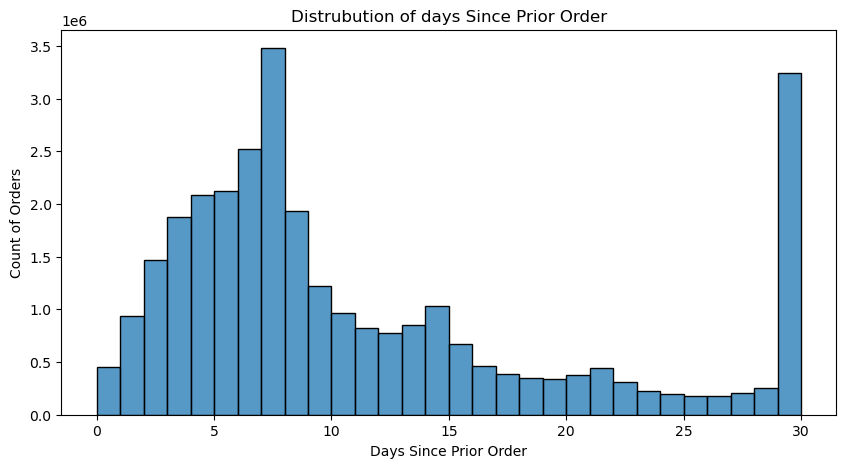

In [10]:
plt.figure(figsize=(10,5))
sns.histplot(complete_df['days_since_prior_order'],bins=30,kde=False)
plt.title("Distrubution of days Since Prior Order")
plt.xlabel("Days Since Prior Order")
plt.ylabel("Count of Orders")
plt.show()

Top 30 Product Orderd

Text(0.5, 1.0, 'Top 30 Product Ordred')

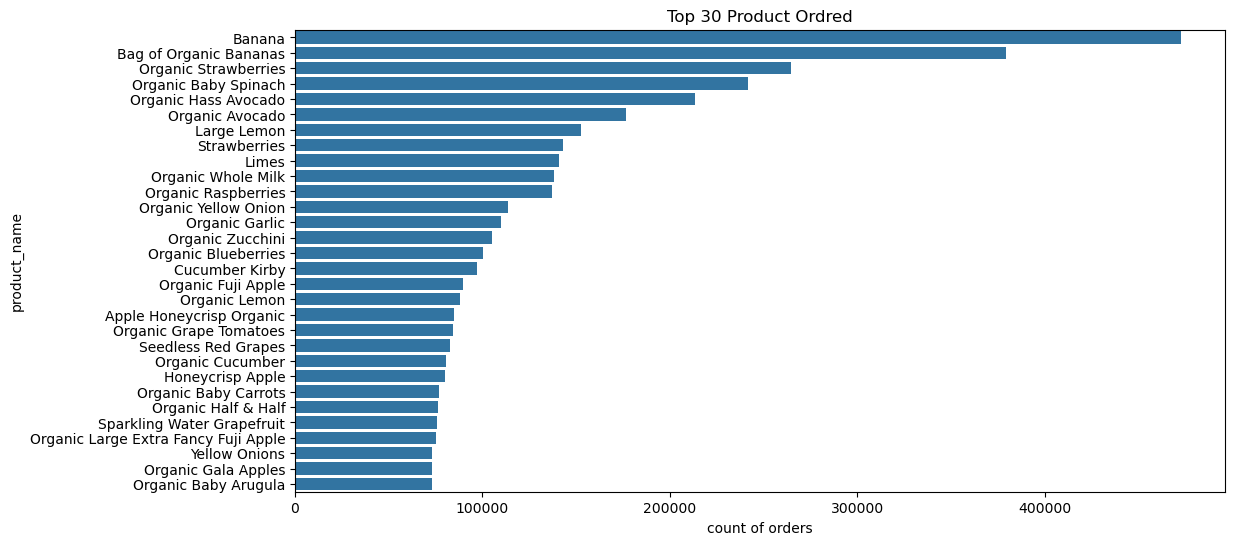

In [11]:
most_ordered=complete_df['product_name'].value_counts().head(30)
plt.figure(figsize=(12,6))
sns.barplot(x=most_ordered,y=most_ordered.index)
plt.xlabel("count of orders")
plt.title("Top 30 Product Ordred")

Day Of Week Plot

<Axes: xlabel='order_dow', ylabel='Count'>

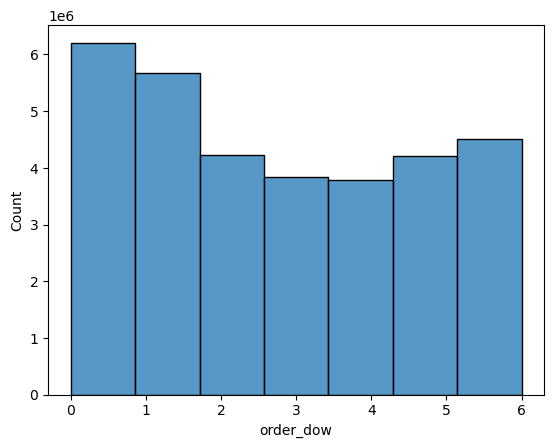

In [12]:
sns.histplot(complete_df['order_dow'],bins=7,kde=False)

Order Per department

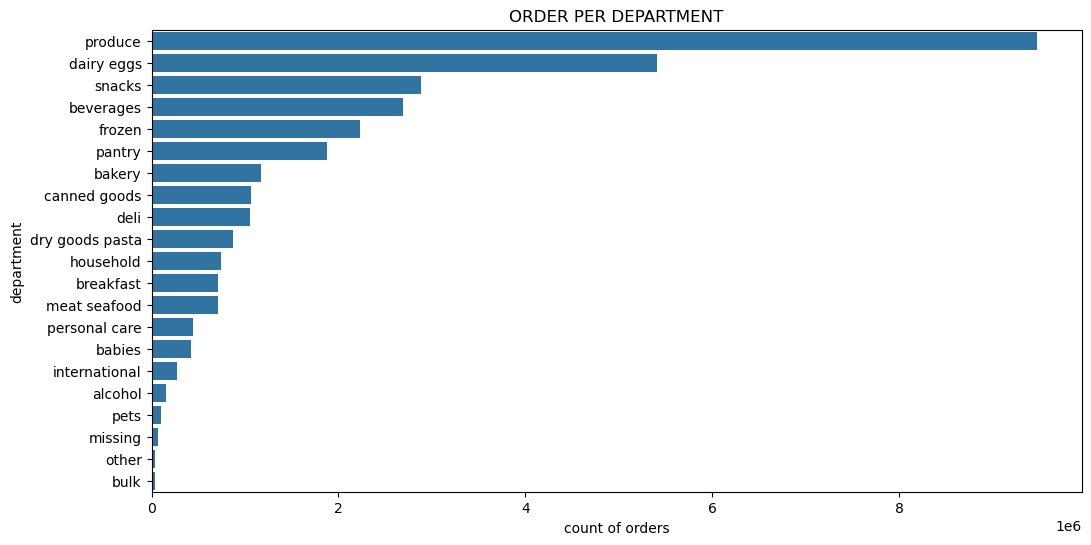

In [13]:
top_departments=complete_df['department'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=top_departments,y=top_departments.index)
plt.xlabel("count of orders")
plt.title("ORDER PER DEPARTMENT")
plt.show()

Number of orders per users

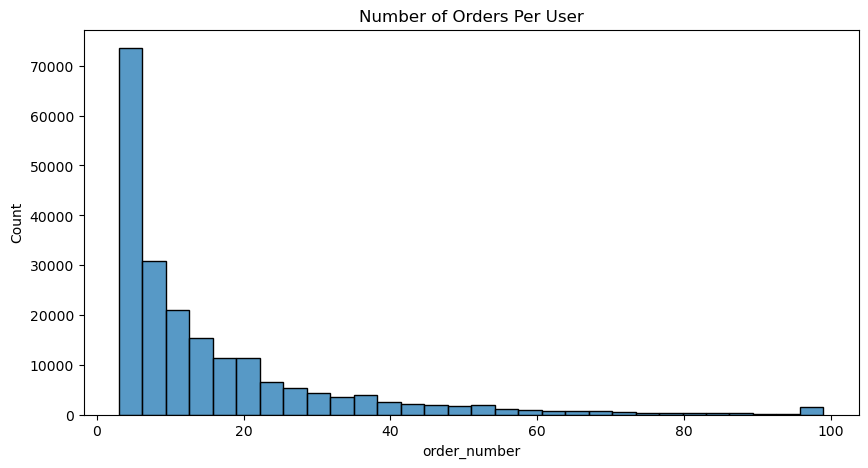

In [14]:
user_order=complete_df.groupby('user_id')['order_number'].max()
plt.figure(figsize=(10,5))
sns.histplot(user_order,bins=30)
plt.title("Number of Orders Per User")
plt.show()


Reorderd Vs orderd


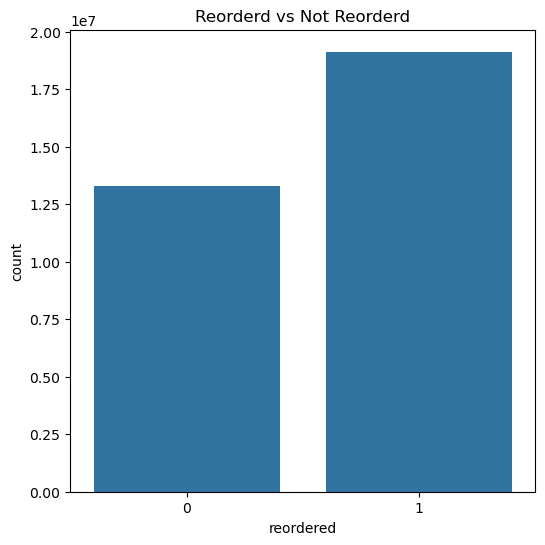

In [15]:
plt.figure(figsize=(6,6))
sns.countplot(x=complete_df['reordered'])
plt.title("Reorderd vs Not Reorderd")
plt.show()

The Top 20 aisle

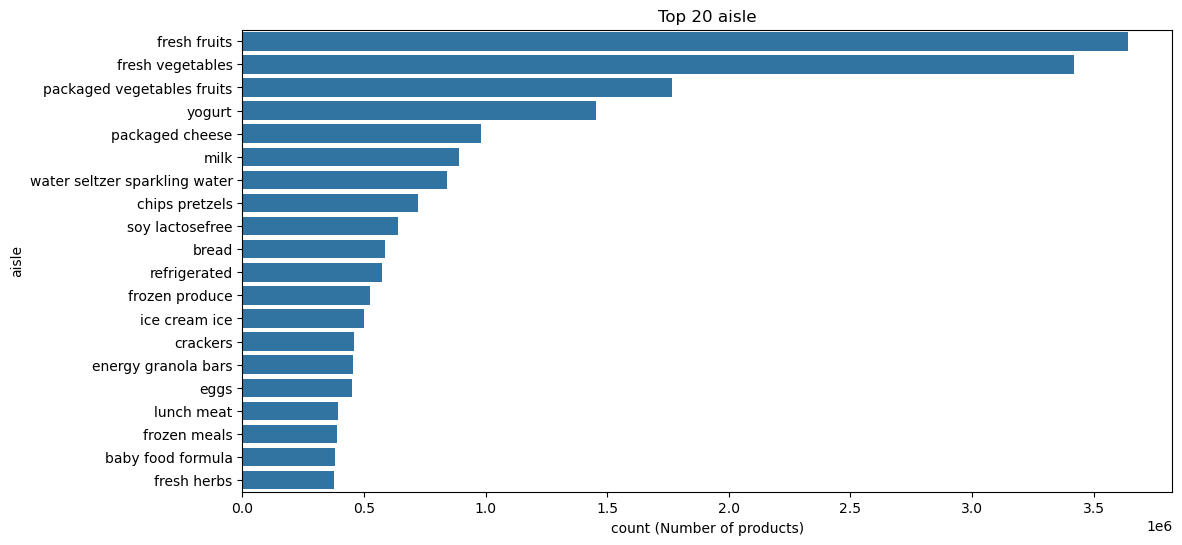

In [16]:
top_aisle=complete_df['aisle'].value_counts().head(20)
plt.figure(figsize=(12,6))
sns.barplot(x=top_aisle,y=top_aisle.index)
plt.title("Top 20 aisle")
plt.xlabel("count (Number of products)")
plt.ylabel("aisle")
plt.show()

REorder VS Order number

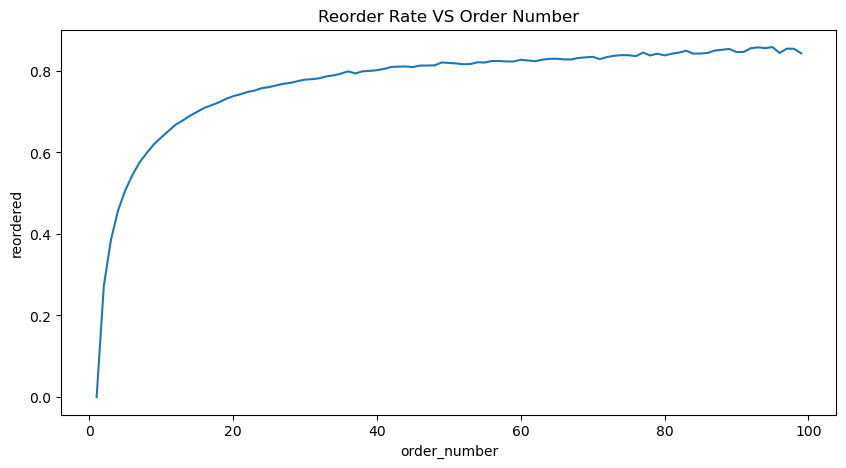

In [17]:
order_ordernum=complete_df.groupby('order_number')['reordered'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=order_ordernum,x='order_number',y='reordered')
plt.title("Reorder Rate VS Order Number")
plt.show()

Handle Numrical Features

In [18]:
num_cols=complete_df.select_dtypes(include=['int32','float32','int64','float64']).columns
num_cols

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'aisle_id',
       'department_id', 'user_id', 'order_number', 'order_dow',
       'order_hour_of_day'],
      dtype='object')

Handle Categorical Features

In [19]:
cat_cols=complete_df.select_dtypes(include=['object']).columns
cat_cols

Index(['product_name', 'department', 'aisle', 'eval_set'], dtype='object')

Correlation For Numrical Featuers ("Heatmap")

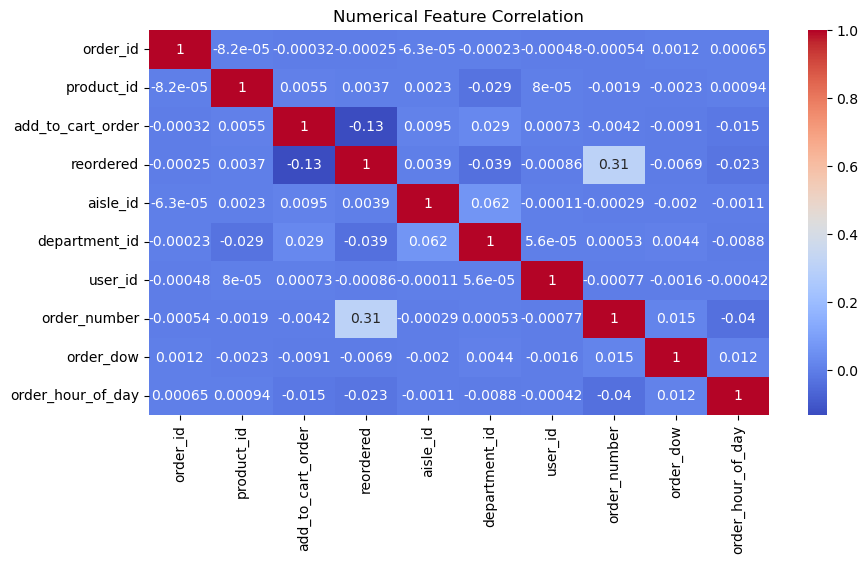

In [20]:
plt.figure(figsize=(10,5))
correlation_matrix=complete_df[num_cols].corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title("Numerical Feature Correlation")
plt.show()

Correlation For Numrical Featuers ("pairwise scatter")

<Figure size 800x900 with 0 Axes>

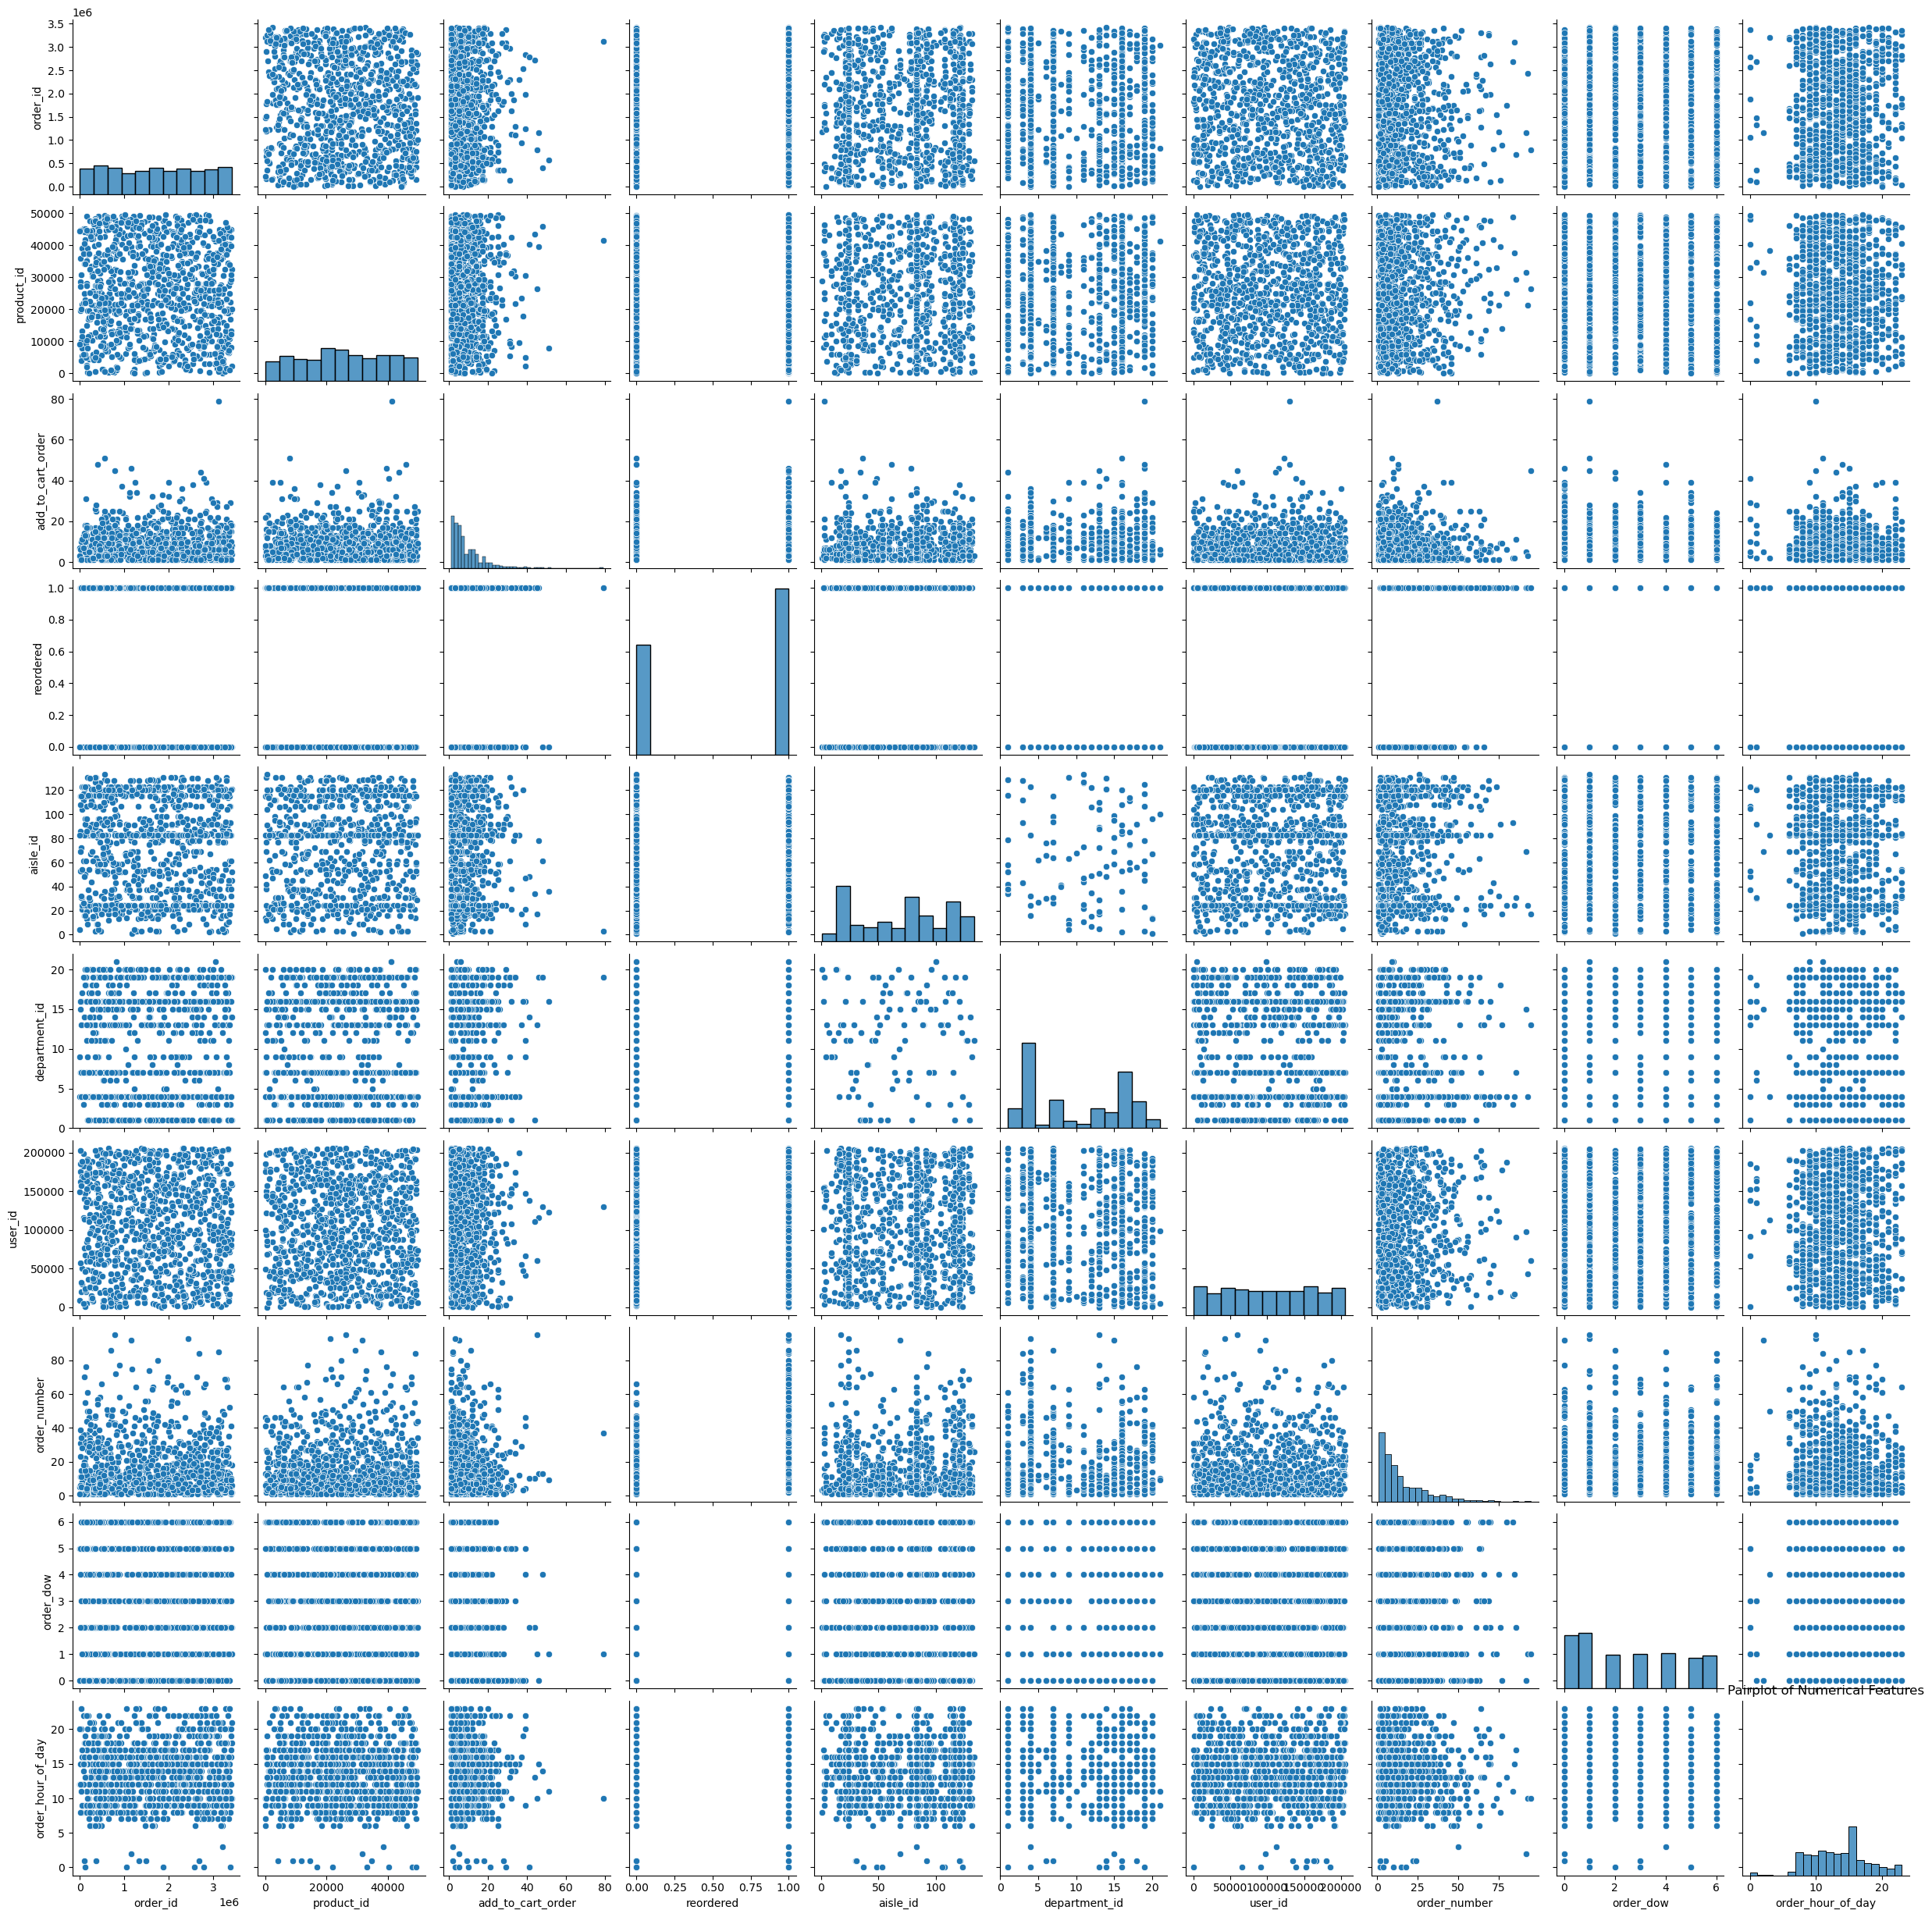

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,9))
sample_df=complete_df.sample(1000,random_state=42)
sns.pairplot(sample_df[num_cols])
plt.title("Pairplot of Numerical Features")
plt.show()

Time Of Day plot

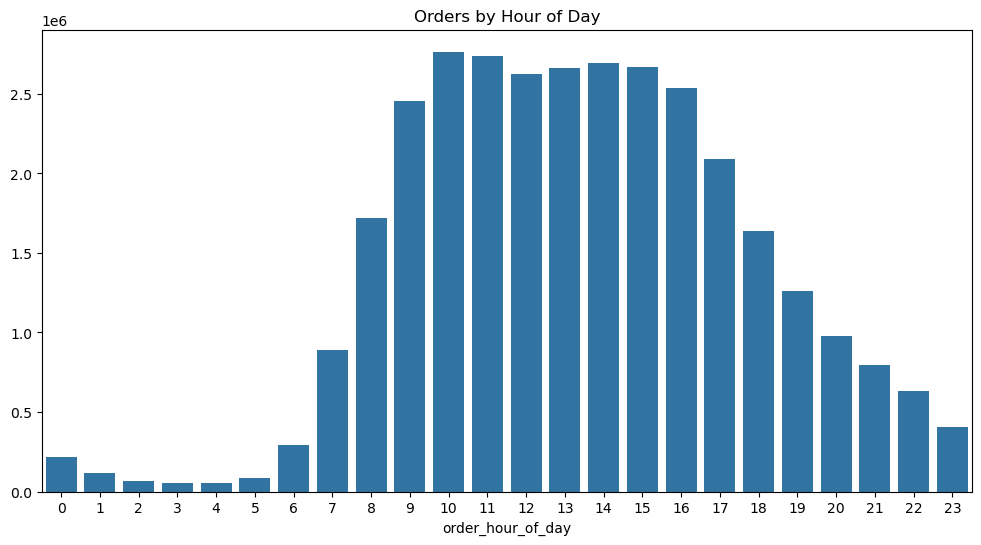

In [22]:
whole_day=complete_df['order_hour_of_day'].value_counts().sort_index()
plt.figure(figsize=(12,6))
sns.barplot(x=whole_day.index,y=whole_day.values)
plt.title("Orders by Hour of Day")
plt.show()


Orders in the Whole Week

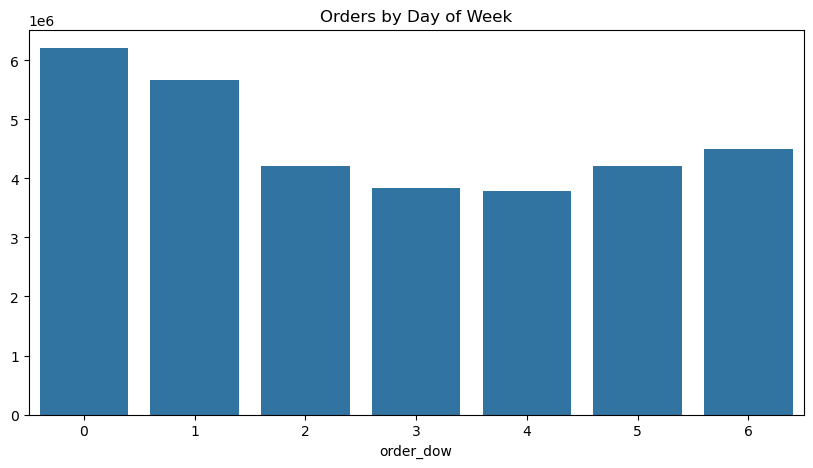

In [23]:
whole_week=complete_df['order_dow'].value_counts().sort_index()
plt.figure(figsize=(10,5))
sns.barplot(x=whole_week.index,y=whole_week.values)
plt.title("Orders by Day of Week")
plt.show()

In [27]:
# --- IGNORE ---

HANDLE MISSING VALUE

In [24]:
missing_value= complete_df.isnull().sum()
missing_value

order_id                        0
product_id                      0
add_to_cart_order               0
reordered                       0
product_name                    0
aisle_id                        0
department_id                   0
department                      0
aisle                           0
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
dtype: int64

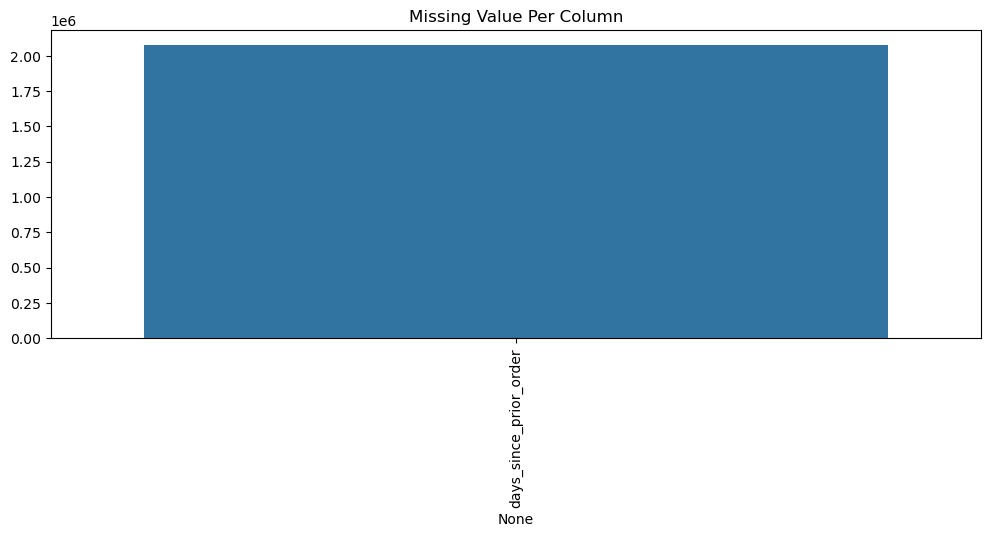

In [25]:
missing_count=complete_df.isnull().sum()
missing_count=missing_count[missing_count>0].sort_values(ascending=False)
plt.figure(figsize=(12,4))
sns.barplot(x=missing_count.index,y=missing_count.values)
plt.xticks(rotation=90)
plt.title("Missing Value Per Column")
plt.show()

In [30]:
print ("..")

..


3. Cleaning & Imputation

Median Imputation

In [26]:
from sklearn.impute import SimpleImputer
median_df=complete_df.copy()
median_imputer=SimpleImputer(strategy='median')
median_df['days_since_prior_order']=median_imputer.fit_transform(median_df[['days_since_prior_order']])
median_df.isnull().sum()

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
department                0
aisle                     0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

 Median Visualize

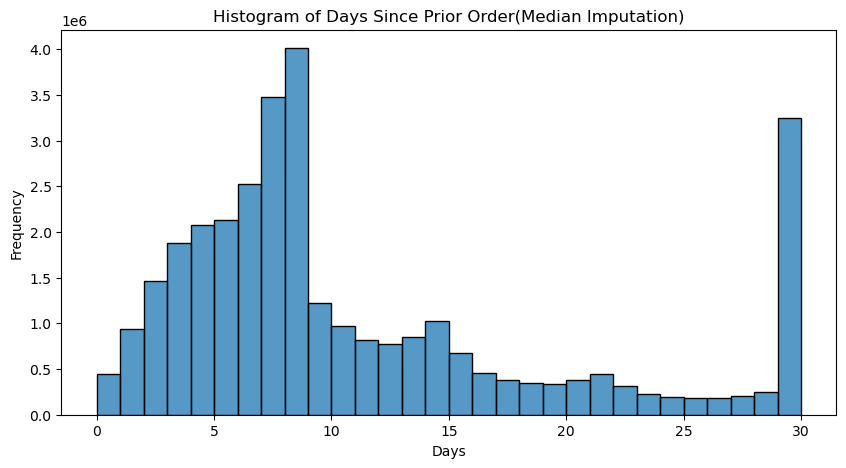

In [27]:
median_df.isnull().sum()
plt.figure(figsize=(10,5))
sns.histplot(median_df['days_since_prior_order'], bins=30, kde=False)
plt.title("Histogram of Days Since Prior Order(Median Imputation)")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

Most Frequent (Mode) Imputation

In [28]:
from sklearn.impute import SimpleImputer
freq_df=complete_df.copy()
freq_imputer = SimpleImputer(strategy='most_frequent')
freq_df['days_since_prior_order'] = freq_imputer.fit_transform(freq_df[['days_since_prior_order']])
freq_df.isnull().sum()

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
department                0
aisle                     0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

Most Frequent (Mode) Visualize

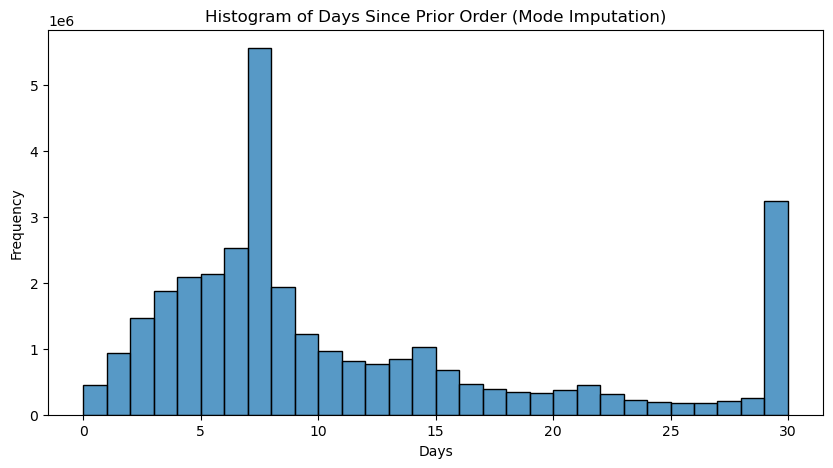

In [29]:
plt.figure(figsize=(10,5))
sns.histplot(freq_df['days_since_prior_order'], bins=30, kde=False)
plt.title("Histogram of Days Since Prior Order (Mode Imputation)")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

Sentinel Imputation (الي رح نعتمده)

In [6]:
from sklearn.impute import SimpleImputer
sentinel_df=complete_df.copy()
sentinel_vl=0
sentinel_df['days_since_prior_order']=sentinel_df['days_since_prior_order'].fillna(sentinel_vl)
sentinel_df.isnull().sum()



order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
department                0
aisle                     0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [7]:
complete_df['days_since_prior_order']=complete_df['days_since_prior_order'].fillna(sentinel_vl)

Sentinel Visualize

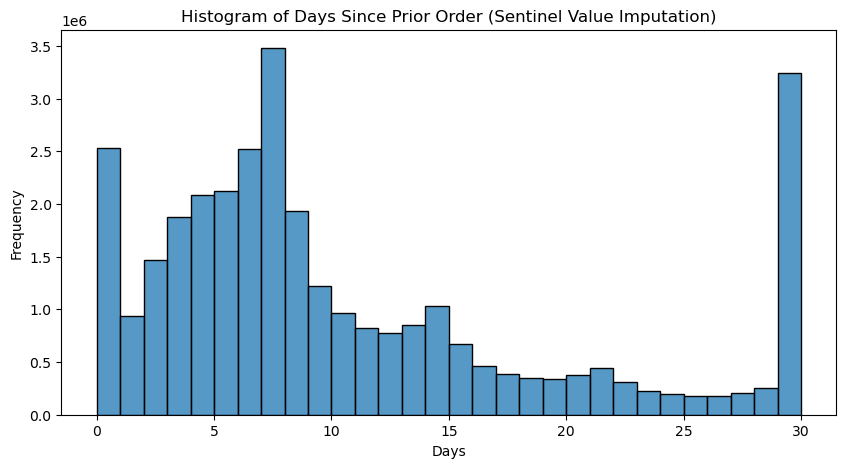

In [32]:
plt.figure(figsize=(10,5))
sns.histplot(sentinel_df['days_since_prior_order'], bins=30, kde=False)
plt.title("Histogram of Days Since Prior Order (Sentinel Value Imputation)")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

Model-Based Imputation (KNN Imputer)

In [33]:
from sklearn.impute import KNNImputer
sample_knn = complete_df.sample(100000, random_state=42)
knn_imputer = KNNImputer(n_neighbors=5)
knn_sample_df = sample_knn.copy()
knn_sample_df[['days_since_prior_order']] = knn_imputer.fit_transform(knn_sample_df[['days_since_prior_order']])
knn_sample_df.isnull().sum()

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
department                0
aisle                     0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

Model Based Visualize

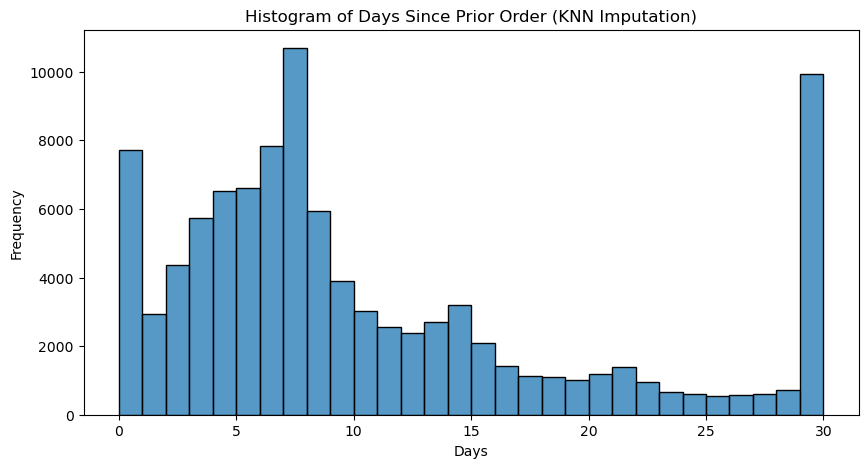

In [34]:
plt.figure(figsize=(10,5))
sns.histplot(knn_sample_df['days_since_prior_order'], bins=30, kde=False)
plt.title("Histogram of Days Since Prior Order (KNN Imputation)")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

3-Outlier Detection & Treatment (Z-Score Method)

In [35]:
outlier_columns = []
for col in complete_df.select_dtypes(include=['int', 'float']):
    Q1 = complete_df[col].quantile(0.25)
    Q3 = complete_df[col].quantile(0.75)
    IQR = Q3 - Q1

    if ((complete_df[col] < (Q1 - 1.5 * IQR)) | (complete_df[col] > (Q3 + 1.5 * IQR))).any():
        outlier_columns.append(col)

print("Outlier columns:", outlier_columns)


Outlier columns: ['add_to_cart_order', 'order_number', 'order_hour_of_day']


In [36]:
import numpy as np
outlier_columns=['add_to_cart_order','order_number']
mean_val =complete_df[outlier_columns].mean()
std_val  = complete_df[outlier_columns].std()
z_score = (complete_df[outlier_columns]- mean_val) / std_val
z_score


,add_to_cart_order,order_number
0,-1.031488,-0.806502
1,-0.891170,-0.806502
2,-0.750852,-0.806502
3,-0.610534,-0.806502
4,-0.470216,-0.806502
...,...,...
32434484,-0.329898,0.391100
32434485,-0.189580,0.391100
32434486,-0.049262,0.391100
32434487,0.091056,0.391100



Extracting Outliers

In [37]:
outlier_z = z_score[(z_score > 3) | (z_score < -3)]
print(outlier_z.shape)
len(outlier_z)

(32434489, 2)


32434489

Boxplot Before Removing Outliers (Z-score) Visualize

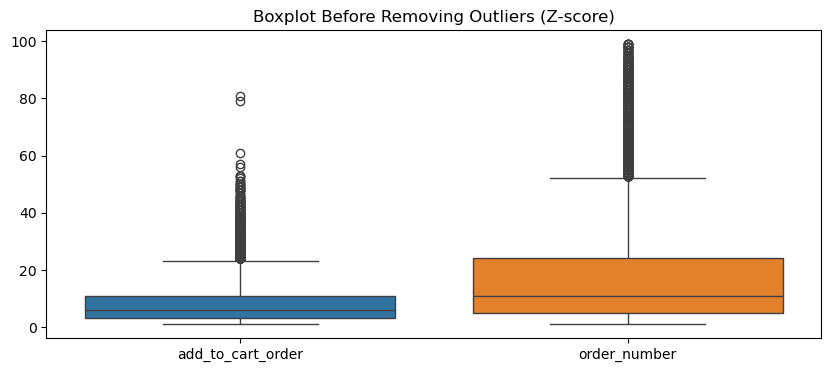

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,4))
sample_df=complete_df.sample(20000,random_state=42)
sns.boxplot(data=sample_df[outlier_columns])
plt.title("Boxplot Before Removing Outliers (Z-score)")
plt.show()


Histogram Before Removing Outliers (Z-score) Visualize

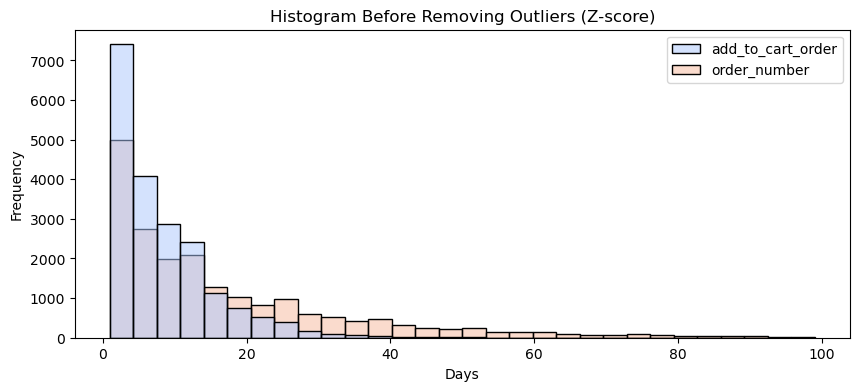

In [39]:
plt.figure(figsize=(10,4))
sns.histplot(data=sample_df[outlier_columns], bins=30, kde=False,palette="coolwarm")
plt.title("Histogram Before Removing Outliers (Z-score)")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

Removing Outliers

In [40]:
clean_z_df =sample_df[(z_score <= 3) & (z_score >= -3)]
clean_z_df.shape

(20000, 15)

Boxplot After Removing Outliers

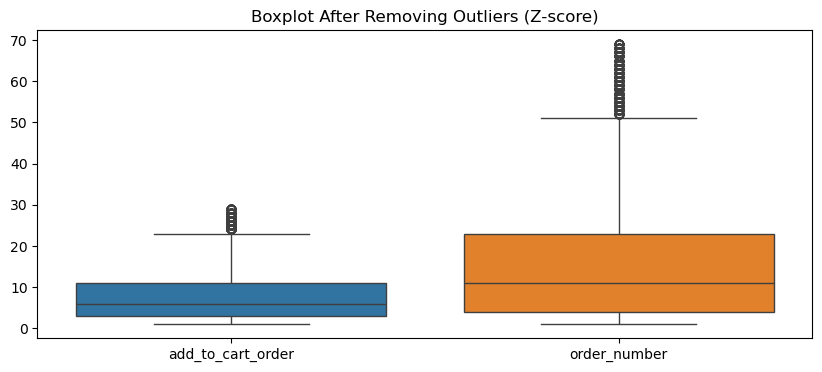

In [41]:
plt.figure(figsize=(10,4))
sns.boxplot(data=clean_z_df[outlier_columns])
plt.title("Boxplot After Removing Outliers (Z-score)")
plt.show()


Histogram After Removing Outliers

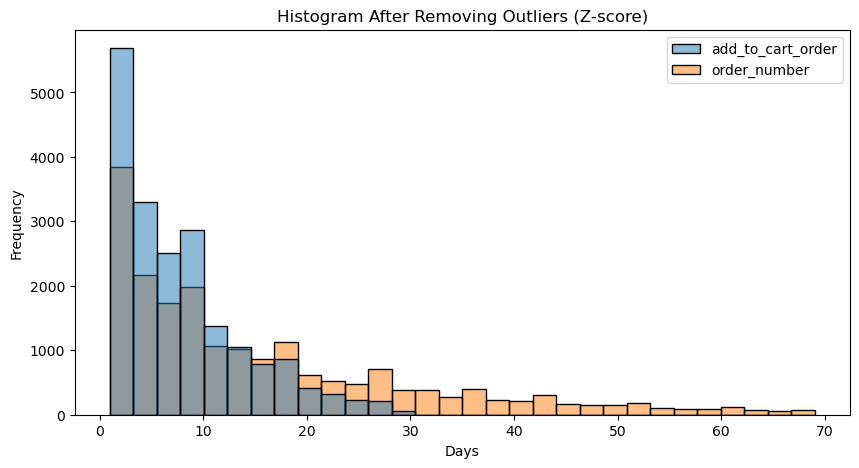

In [42]:
plt.figure(figsize=(10,5))
sns.histplot(data=clean_z_df[outlier_columns], bins=30, kde=False)
plt.title("Histogram After Removing Outliers (Z-score)")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

4-Encoding Categorical Variables

One-Hot Encoding (for low-cardinality categories)

In [43]:
low_card= ['department', 'aisle']
one_hot = pd.get_dummies(
   complete_df,
    columns=low_card,
    drop_first=True,
    sparse=True)

one_hot.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,...,aisle_spreads,aisle_tea,aisle_tofu meat alternatives,aisle_tortillas flat bread,aisle_trail mix snack mix,aisle_trash bags liners,aisle_vitamins supplements,aisle_water seltzer sparkling water,aisle_white wines,aisle_yogurt
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,...,False,False,False,False,False,False,False,False,False,False
1,2,28985,2,1,Michigan Organic Kale,83,4,202279,prior,3,...,False,False,False,False,False,False,False,False,False,False
2,2,9327,3,0,Garlic Powder,104,13,202279,prior,3,...,False,False,False,False,False,False,False,False,False,False
3,2,45918,4,1,Coconut Butter,19,13,202279,prior,3,...,False,False,False,False,False,False,False,False,False,False
4,2,30035,5,0,Natural Sweetener,17,13,202279,prior,3,...,False,False,False,False,False,False,False,False,False,False


5. Feature Scaling

Feature Scaling("StandardScaler")

In [44]:
from sklearn.preprocessing import StandardScaler
standard_df=complete_df.copy()
scaler=StandardScaler()
standard_df[num_cols]=scaler.fit_transform(complete_df[num_cols])
standard_df.head()


c:\ProgramData\anaconda3\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,-1.732751,0.535137,-1.031488,0.834137,Organic Egg Whites,0.387029,0.967671,dairy eggs,eggs,1.670551,prior,-0.806502,1.08188,-1.042062,8.0
1,-1.732751,0.241806,-0.891170,0.834137,Michigan Organic Kale,0.308502,-0.942805,produce,fresh vegetables,1.670551,prior,-0.806502,1.08188,-1.042062,8.0
2,-1.732751,-1.152706,-0.750852,-1.198844,Garlic Powder,0.858196,0.490052,pantry,spices seasonings,1.670551,prior,-0.806502,1.08188,-1.042062,8.0
3,-1.732751,1.443010,-0.610534,0.834137,Coconut Butter,-1.366758,0.490052,pantry,oils vinegars,1.670551,prior,-0.806502,1.08188,-1.042062,8.0
4,-1.732751,0.316291,-0.470216,-1.198844,Natural Sweetener,-1.419110,0.490052,pantry,baking ingredients,1.670551,prior,-0.806502,1.08188,-1.042062,8.0


Feature Scaling("MinMaxScaler")

In [45]:
from sklearn.preprocessing import MinMaxScaler
min_max_df=complete_df.copy()
MMS=MinMaxScaler()
min_max_df[num_cols]=MMS.fit_transform(complete_df[num_cols])
min_max_df.head()

c:\ProgramData\anaconda3\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,0.0,0.666553,0.000000,1.0,Organic Egg Whites,0.639098,0.75,dairy eggs,eggs,0.980942,prior,0.020408,0.833333,0.391304,8.0
1,0.0,0.583332,0.006944,1.0,Michigan Organic Kale,0.616541,0.15,produce,fresh vegetables,0.980942,prior,0.020408,0.833333,0.391304,8.0
2,0.0,0.187695,0.013889,0.0,Garlic Powder,0.774436,0.60,pantry,spices seasonings,0.980942,prior,0.020408,0.833333,0.391304,8.0
3,0.0,0.924125,0.020833,1.0,Coconut Butter,0.135338,0.60,pantry,oils vinegars,0.980942,prior,0.020408,0.833333,0.391304,8.0
4,0.0,0.604464,0.027778,0.0,Natural Sweetener,0.120301,0.60,pantry,baking ingredients,0.980942,prior,0.020408,0.833333,0.391304,8.0


6- Feature Enginnering

In [8]:
df = pd.DataFrame(complete_df , columns = complete_df.columns)
df.isnull().sum()

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
department                0
aisle                     0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

-User Level Features

In [9]:
user_total_orders = df.groupby('user_id')['order_number'].max().reset_index()
user_total_orders.columns = ['user_id', 'user_total_orders']#total_order
user_total_orders=user_total_orders.sort_values(by='user_id').reset_index(drop=True)
user_total_orders

,user_id,user_total_orders
0,1,10
1,2,14
2,3,12
3,4,5
4,5,4
...,...,...
206204,206205,3
206205,206206,67
206206,206207,16
206207,206208,49


In [10]:
basket_data = df.groupby('user_id').agg({ 'product_id':'count', 'order_number': 'max'}).reset_index()
basket_data.columns = ['user_id', 'total_products_ordered', 'total_orders']
basket_data['avg_basket_size'] = basket_data['total_products_ordered'] / basket_data['total_orders']#avg basket sizehحجم سلة المتوسط يلي كل مره بشتري فيها 
basket_data.head()

,user_id,total_products_ordered,total_orders,avg_basket_size
0,1,59,10,5.900000
1,2,195,14,13.928571
2,3,88,12,7.333333
3,4,18,5,3.600000
4,5,37,4,9.250000


In [11]:
user_features = df.groupby('user_id').agg({
    'order_number': 'max',       
     'product_id': 'count',       
    'reordered': 'mean',         
    'days_since_prior_order': ['mean', 'last'] 
}).reset_index()
user_features.columns = ['user_id',  'user_total_orders',  'user_total_items', 'user_reorder_ratio','user_avg_days_between', 'user_days_since_last_order'  ]
display(user_features.head())


,user_id,user_total_orders,user_total_items,user_reorder_ratio,user_avg_days_between,user_days_since_last_order
0,1,10,59,0.694915,18.542374,19.0
1,2,14,195,0.476923,14.902564,30.0
2,3,12,88,0.625000,10.181818,7.0
3,4,5,18,0.055556,11.944445,0.0
4,5,4,37,0.378378,10.189189,0.0


In [12]:
user_features = df.groupby('user_id').agg({
    'order_number': 'max',       
     'product_id': 'count',       
    'reordered': 'mean',         
    'days_since_prior_order': ['mean', 'last'] 
}).reset_index()
user_features.columns = ['user_id',  'user_total_orders',  'total_products_ordered', 'user_reorder_ratio','user_avg_days_between', 'user_days_since_last_order'  ]
user_features['user_avg_basket_size'] = user_features[  'total_products_ordered'] / user_features['user_total_orders'] #size of basket
display(user_features.head())


,user_id,user_total_orders,user_total_items,user_reorder_ratio,user_avg_days_between,user_days_since_last_order,user_avg_basket_size
0,1,10,59,0.694915,18.542374,19.0,5.900000
1,2,14,195,0.476923,14.902564,30.0,13.928571
2,3,12,88,0.625000,10.181818,7.0,7.333333
3,4,5,18,0.055556,11.944445,0.0,3.600000
4,5,4,37,0.378378,10.189189,0.0,9.250000


- Product-level features

In [13]:
product_features = df.groupby('product_id').agg({ 
        'reordered': 'mean', 
        'add_to_cart_order': 'mean',   
        'user_id': 'count'   #Popularity
}).reset_index()
product_features.columns = [ 'product_id' ,'product_reorder_rate', 'product_avg_cart_position', 'product_total_purchases']
display(product_features.head())

,product_id,product_reorder_rate,product_avg_cart_position,product_total_purchases
0,1,0.613391,5.801836,1852
1,2,0.133333,9.888889,90
2,3,0.732852,6.415162,277
3,4,0.446809,9.507599,329
4,5,0.600000,6.466667,15


User×Product interaction features

In [14]:

uxp_features = df.groupby(['user_id', 'product_id']).agg({
    'reordered': ['count', 'mean'], #prior purchase count& reorder probability عدد لمشتريات السابقة 
    'order_number': 'max'#last order
}).reset_index()  
uxp_features.columns = [
    'user_id', 
    'product_id', 
    'uxp_total_bought',       # كم مرة اشترى المنتج
    'uxp_reorder_ratio',      # نسبة إعادة الطلب
    'uxp_last_order_num'      # رقم آخر طلب اشترى فيه المنتج (عشان نحسب Recency بعدين)
]

display(uxp_features.head(20))

,user_id,product_id,uxp_total_bought,uxp_reorder_ratio,uxp_last_order_num
0,1,196,10,0.900000,10
1,1,10258,9,0.888889,10
2,1,10326,1,0.000000,5
3,1,12427,10,0.900000,10
4,1,13032,3,0.666667,10
5,1,13176,2,0.500000,5
6,1,14084,1,0.000000,1
7,1,17122,1,0.000000,5
8,1,25133,8,0.875000,10
9,1,26088,2,0.500000,2


Temporal features

In [15]:
df['order_hour']=df['order_hour_of_day']#Hour

df['order_day']=df['order_dow']#Day

start_year=2024
days_per_year=365
df['order_year'] = start_year + df['days_since_prior_order']//days_per_year #Year
df['order_month'] = ((df['days_since_prior_order'] % days_per_year) // 30) + 1 #Month

def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'
df['order_season'] = df['order_month'].apply(get_season)#Season

df['is_weekend'] = df['order_dow'].apply(lambda x: 1 if x in [0, 1] else 0)#Holiday


In [16]:
                                                                                              #جزء من temporal features ممكن انه نعملها 

def time_of_day(hour):
    if 6 <= hour < 11:                                                                        # بحيث انه اقسم الوقت صبح ومسا وهيك
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 18 <= hour < 23:
        return 'Evening'
   
    else:
        return 'Night'
df['time_of_day'] = df['order_hour_of_day'].apply(time_of_day)
print(df['time_of_day'].head(10))

0    Morning
1    Morning
2    Morning
3    Morning
4    Morning
5    Morning
6    Morning
7    Morning
8    Morning
9      Night
Name: time_of_day, dtype: object


Aggregations over windows (e.g., last 3 orders, last 6 months).

In [17]:

order_metrics = df.groupby(['user_id', 'order_number']).agg({
    'product_id': 'count',            # حجم السلة (كم حبة اشترى بالطلب)
    'days_since_prior_order': 'max'   # كم يوم غاب قبل هاد الطلب
}).reset_index()

order_metrics.rename(columns={
    'product_id': 'basket_size',
    'days_since_prior_order': 'days_gap'
}, inplace=True)

# لازم نرتب تصاعدي عشان لما نقول "آخر 3" يكونوا عنجد آخر 3
order_metrics = order_metrics.sort_values(['user_id', 'order_number'])

def get_recent_avg(x):
    return x.rolling(window=3, min_periods=1).mean()

order_metrics['avg_basket_last_3'] = order_metrics.groupby('user_id')['basket_size'].transform(get_recent_avg)#متوسط عدد المنتجات ل اخر 3 طلبات


order_metrics['avg_days_gap_last_3'] = order_metrics.groupby('user_id')['days_gap'].transform(get_recent_avg) #المتوسط الزمني بين الطلبات الثلاث الاخيرة 

user_rolling_features = order_metrics.groupby('user_id').last().reset_index() #احدث حالة لكل مستخدم 

user_rolling_features = user_rolling_features[['user_id', 'avg_basket_last_3', 'avg_days_gap_last_3']]


display(user_rolling_features.head(10))   

,user_id,avg_basket_last_3,avg_days_gap_last_3
0,1,7.000000,14.666667
1,2,14.666667,23.666667
2,3,5.666667,14.333333
3,4,4.000000,12.000000
4,5,8.666667,13.333333
5,6,4.666667,6.000000
6,7,10.000000,5.666667
7,8,16.333333,20.000000
8,9,25.333333,12.000000
9,10,30.666667,16.333333


In [18]:
train_df = df.copy()
train_df = train_df.merge(user_features , on = 'user_id' , how = 'left')
train_df = train_df.drop(columns=[col for col in user_features.columns if col in train_df.columns and col != 'user_id']) #تجنب التكرار
train_df = train_df.merge(user_features , on = 'user_id', how = 'left')
train_df = train_df.merge(product_features , on = 'product_id', how = 'left')
train_df = train_df.merge(uxp_features , on = ['user_id' , 'product_id'] , how = 'left')
train_df = train_df.merge(user_rolling_features , on = 'user_id' , how = 'left')

At least one engineered non-linear feature (log transforms, polynomial, interaction
terms).


In [19]:
df['log_days_gap'] = np.log1p(df['days_since_prior_order'])
df[['days_since_prior_order', 'log_days_gap']].head(10)

,days_since_prior_order,log_days_gap
0,8.0,2.197225
1,8.0,2.197225
2,8.0,2.197225
3,8.0,2.197225
4,8.0,2.197225
5,8.0,2.197225
6,8.0,2.197225
7,8.0,2.197225
8,8.0,2.197225
9,12.0,2.564949


Dimensionality & collinearity

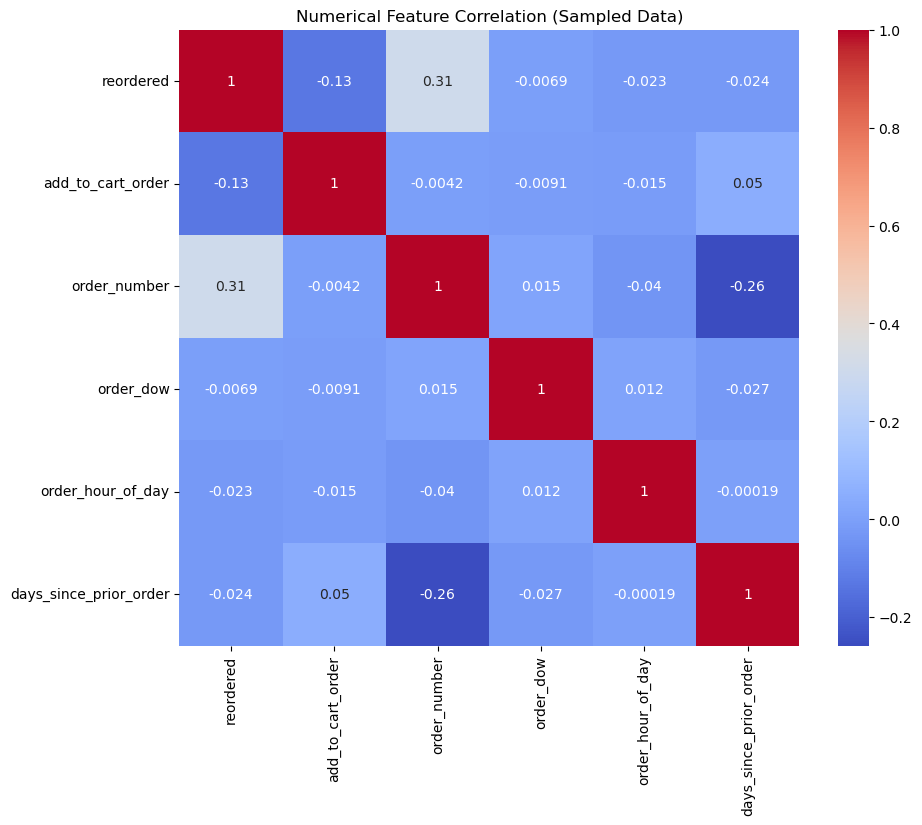

In [61]:
cols_for_corr = [
    'reordered', 
    'add_to_cart_order', 
    'order_number', 
    'order_dow', 
    'order_hour_of_day', 
    'days_since_prior_order'
]

sample_corr = complete_df[cols_for_corr].corr()
plt.figure(figsize=(10,8))
sns.heatmap(sample_corr, annot=True, cmap='coolwarm')
plt.title("Numerical Feature Correlation (Sampled Data)")
plt.show()

In [20]:
id_cols = ['order_id' , 'user_id' , 'product_id' , 'aisle_id' , 'department_id']
low_cols = ["department_id" , "order_dow" , "time_of_day"] 
high_cols = ["user_id" , "product_id" , "aisle_id"] 

train_df[high_cols] = train_df[high_cols].astype(str)
#هالحركه سويتها بعد ما متت وانا بحلل الكود بعد ما طلعلي التنبيه هاض
#Warning: No categorical columns found. Calling 'transform' will only return input data.
#لما راجعت الانكوديرز تذكرت انه التارقيت ما بشتغل غير مع نصوص والاعمده اللي انا معطيه اياهم رقميات

target_col = "reordered"
Frequency_col = "product_name"

#عدد الاعمده كبير جدا فقلت بعمل لوب + استثناءات عشان اريح راسي
num_cols = (train_df.drop(columns=[target_col]).select_dtypes(include=["int32" , "float32"]).columns.tolist())
num_cols = [c for c in num_cols if c not in id_cols]

VIF

In [21]:
reduce_memo(train_df)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle,user_id,...,user_days_since_last_order,user_avg_basket_size,product_avg_cart_position,product_reorder_rate,product_total_purchases,uxp_total_bought,uxp_reorder_ratio,uxp_last_order_num,avg_basket_last_3,avg_days_gap_last_3
0,2,33120,1,1,Organic Egg Whites,86,16,dairy eggs,eggs,202279,...,30.0,11.250000,6.816959,0.708454,19400,5,0.800000,8,13.333333,28.000000
1,2,28985,2,1,Michigan Organic Kale,83,4,produce,fresh vegetables,202279,...,30.0,11.250000,7.501683,0.694465,67449,5,0.800000,6,13.333333,28.000000
2,2,9327,3,0,Garlic Powder,104,13,pantry,spices seasonings,202279,...,30.0,11.250000,9.943166,0.157962,6299,1,0.000000,3,13.333333,28.000000
3,2,45918,4,1,Coconut Butter,19,13,pantry,oils vinegars,202279,...,30.0,11.250000,8.444893,0.272849,744,5,0.800000,7,13.333333,28.000000
4,2,30035,5,0,Natural Sweetener,17,13,pantry,baking ingredients,202279,...,30.0,11.250000,8.481546,0.507909,569,3,0.666667,7,13.333333,28.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434484,3421083,39678,6,1,Free & Clear Natural Dishwasher Detergent,74,17,household,dish detergents,25247,...,21.0,9.259259,9.012514,0.439135,1758,3,0.666667,24,12.000000,6.333333
32434485,3421083,11352,7,0,Organic Mini Sandwich Crackers Peanut Butter,78,19,snacks,crackers,25247,...,21.0,9.259259,10.695290,0.690338,7069,1,0.000000,24,12.000000,6.333333
32434486,3421083,4600,8,0,All Natural French Toast Sticks,52,1,frozen,frozen breakfast,25247,...,21.0,9.259259,9.608381,0.645333,2625,1,0.000000,24,12.000000,6.333333
32434487,3421083,24852,9,1,Banana,24,4,produce,fresh fruits,25247,...,21.0,9.259259,4.894129,0.843501,472565,13,0.923077,25,12.000000,6.333333


In [53]:
num_cols

['add_to_cart_order',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'order_month',
 'is_weekend',
 'user_total_orders',
 'user_total_items',
 'user_reorder_ratio',
 'user_avg_days_between',
 'user_days_since_last_order',
 'user_avg_basket_size',
 'product_avg_cart_position',
 'product_reorder_rate',
 'product_total_purchases',
 'uxp_total_bought',
 'uxp_reorder_ratio',
 'uxp_last_order_num',
 'avg_basket_last_3',
 'avg_days_gap_last_3']

In [56]:
%pip install statsmodels
#بدي استخدم VIF , هاض عباره عن فنكشن رياضي ببين قديش في ارتباط وتكرار بين الاعمده نفسهم 
#الهدف منه اني اشوف شو في اعمده فيهم تشابه كبير وبقدمو نفس المعلومه تقريبا عشان احذف واحد منهم
#بدي استخدم VIF , هاض عباره عن فنكشن رياضي ببين قديش في ارتباط وتكرار بين الاعمده نفسهم 
#الهدف منه اني اشوف شو في اعمده فيهم تشابه كبير وبقدمو نفس المعلومه تقريبا عشان احذف واحد منهم
from statsmodels.stats.outliers_influence import variance_inflation_factor
SAMPLE_SIZE = 50000 
V = train_df[num_cols].sample(n=SAMPLE_SIZE , random_state = 42)

vif = pd.DataFrame()
vif["feature"] = V[num_cols].columns
vif["VIF"] = [variance_inflation_factor(V.values , i) for i in range(V.shape[1])]

#تحت 5 ممتاز
#بين ال 6 وال 10 مقبول
#اكثر من هيك بدك تشوف شو و وين في ترابط غير مهم وتبلش تحذف
#ال inf حذف مباشره

vif.sort_values("VIF" , ascending = True)

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


,feature,VIF
14,product_total_purchases,1.574149
10,user_days_since_last_order,3.176368
0,add_to_cart_order,3.479319
15,uxp_total_bought,3.663899
5,is_weekend,4.637032
1,order_number,5.764452
16,uxp_reorder_ratio,7.724561
2,order_dow,7.880490
19,avg_days_gap_last_3,9.702942
3,order_hour_of_day,10.356283


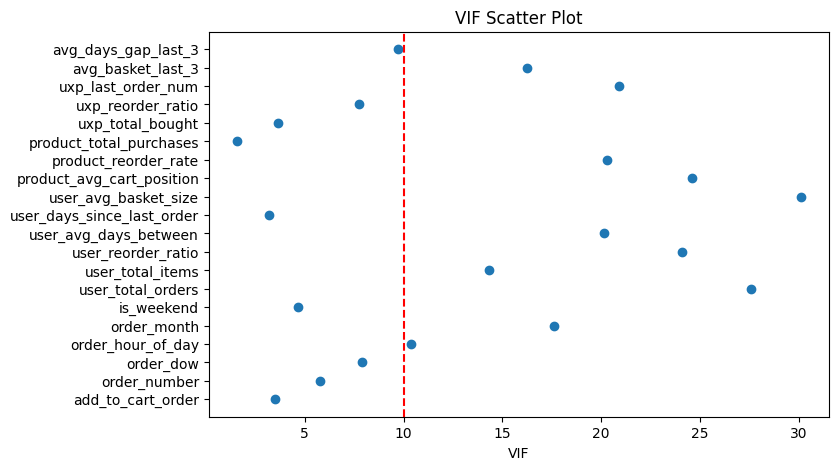

In [57]:
plt.figure(figsize = (8 , 5))
plt.scatter(vif["VIF"] , vif["feature"])
plt.axvline(10 , color = 'red' , linestyle = '--')
plt.xlabel("VIF")
plt.title("VIF Scatter Plot")
plt.show()


In [22]:
#حذفت القيم اللانهائيه , والقيم اللي فيها النسبه عاليه , لانهم بدلو على تكرار وتشابه المعلومات , يعني لو خليتهم كلهم زي كأني مكرر نفس العامود ما فرقت 
drop_cols = [
    
    "uxp_days_last_order_" ,
    #u_total_orders_log كنت بدي اخليه بما انه تعبنا عليه بمرحلة الهندسه بس النسبه فيه كانت كثير عاليه :(
    "user_total_orders" ,

    "product_avg_cart_position" ,
    "product_reorder_rate" ,
    "user_reorder_ratio" 
    ]

train_df = train_df.drop(columns = drop_cols , errors="ignore")

#صار عندي ايرور بالبريبروسيسر لانه الداتا صار فيها عدم تطابق بعد الدروب ف بدي ارجع انسخ الاعمده كمان مره
num_cols = (train_df.drop(columns=[target_col]).select_dtypes(include=["int32" , "float32"]).columns.tolist())
num_cols = [c for c in num_cols if c not in id_cols]

Embalanced Data Handling

In [46]:
orders_train = pd.read_csv(r"C:\Users\Acer Nitro\Downloads\order_products__train.csv\order_products__train.csv")
orders_train = orders_train[['order_id', 'product_id', 'reordered']]

train_df['reordered_y']=orders_train['reordered']



In [47]:
train_df['reordered_y'].value_counts()
train_df['reordered_y'].isnull().sum()

np.int64(31049872)

In [48]:
train_df['reordered_y'].isnull().sum()
train_df['reordered_y'] = train_df['reordered_y'].fillna(0).astype(int)

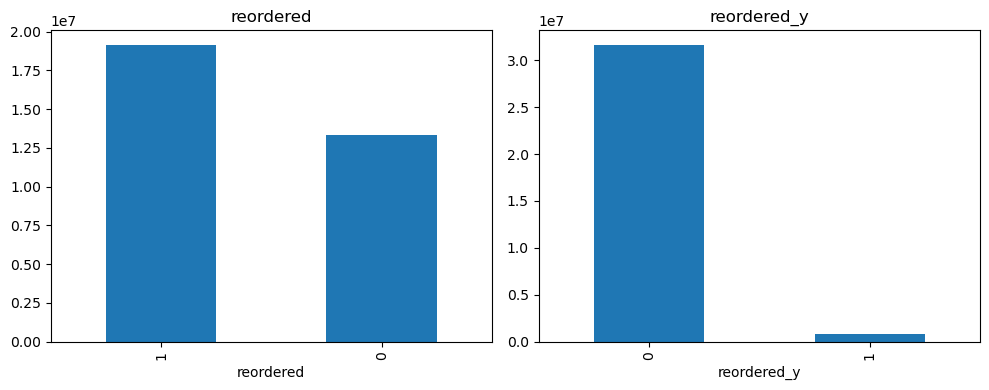

In [49]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train_df['reordered'].value_counts().plot(
    kind='bar', ax=axes[0], title='reordered'
)

train_df['reordered_y'].value_counts().plot(
    kind='bar', ax=axes[1], title='reordered_y'
)

plt.tight_layout()
plt.show()


هيك بنكون بيننا انو اصلا في عنا imbalanced بالداتا

In [73]:
train_df['reordered'][train_df['reordered_y']]

1    1
1    1
0    1
0    1
1    1
    ..
0    1
0    1
0    1
0    1
0    1
Name: reordered, Length: 32434489, dtype: int32

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int32  
 1   product_id         int32  
 2   add_to_cart_order  int32  
 3   reordered          int32  
 4   product_name       object 
 5   aisle_id           int32  
 6   department_id      int32  
 7   department         object 
 8   aisle              object 
 9   user_id            int32  
 10  order_number       int32  
 11  order_dow          int32  
 12  order_hour_of_day  int32  
 13  order_month        float16
 14  order_season       object 
 15  is_weekend         int32  
 16  time_of_day        object 
 17  log_days_gap       float16
 18  reordered_y        int64  
dtypes: float16(2), int32(11), int64(1), object(5)
memory usage: 2.9+ GB


In [75]:
reduce_memo(train_df)

c:\ProgramData\anaconda3\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle,user_id,order_number,order_dow,order_hour_of_day,order_month,order_season,is_weekend,time_of_day,log_days_gap,reordered_y
0,2,33120,1,1,Organic Egg Whites,86,16,dairy eggs,eggs,202279,3,5,9,1.0,Winter,0,Morning,2.197266,1
1,2,28985,2,1,Michigan Organic Kale,83,4,produce,fresh vegetables,202279,3,5,9,1.0,Winter,0,Morning,2.197266,1
2,2,9327,3,0,Garlic Powder,104,13,pantry,spices seasonings,202279,3,5,9,1.0,Winter,0,Morning,2.197266,0
3,2,45918,4,1,Coconut Butter,19,13,pantry,oils vinegars,202279,3,5,9,1.0,Winter,0,Morning,2.197266,0
4,2,30035,5,0,Natural Sweetener,17,13,pantry,baking ingredients,202279,3,5,9,1.0,Winter,0,Morning,2.197266,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434484,3421083,39678,6,1,Free & Clear Natural Dishwasher Detergent,74,17,household,dish detergents,25247,24,2,6,1.0,Winter,0,Morning,3.091797,0
32434485,3421083,11352,7,0,Organic Mini Sandwich Crackers Peanut Butter,78,19,snacks,crackers,25247,24,2,6,1.0,Winter,0,Morning,3.091797,0
32434486,3421083,4600,8,0,All Natural French Toast Sticks,52,1,frozen,frozen breakfast,25247,24,2,6,1.0,Winter,0,Morning,3.091797,0
32434487,3421083,24852,9,1,Banana,24,4,produce,fresh fruits,25247,24,2,6,1.0,Winter,0,Morning,3.091797,0


In [61]:
train_df=train_df.drop('reordered_y',axis=1)

KeyError: "['reordered_y'] not found in axis"

TO SMOTE

In [23]:
id_cols = ['order_id', 'user_id', 'product_id', 'aisle_id', 'department_id']
low_cols_ = ["department", "order_dow" , "time_of_day", "aisle", "order_season"] 
high_cols = ["user_id", "product_id", "aisle_id"] 

df[high_cols] = df[high_cols].astype(str)
# عشان التارقيت ما بوخذ غير category

target_col = "reordered_y"
Frequency_col = "product_name"
num_cols_ = [
    
    'user_avg_basket',
    'user_reorder_ratio',
    'user_last_order_recency',
    'product_popularity',
    'user_prod_purchase_count'
]

In [74]:
train_df_.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'department', 'aisle',
       'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'order_month', 'order_season', 'is_weekend', 'time_of_day',
       'user_total_items', 'user_avg_days_between',
       'user_days_since_last_order', 'user_avg_basket_size',
       'product_total_purchases', 'uxp_total_bought', 'uxp_reorder_ratio',
       'uxp_last_order_num', 'avg_basket_last_3', 'avg_days_gap_last_3',
       'last__orders'],
      dtype='object')

In [24]:
# Ensure category_encoders is installed in the current kernel (try both PyPI names to be robust)
%pip install --quiet category_encoders


# import after installation
import category_encoders as ce

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Frequency_col is a single column name string — pass as a list to ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot",
         OneHotEncoder(handle_unknown="ignore", sparse_output=True, drop="first"),
         low_cols),

        ("target",
         ce.TargetEncoder(min_samples_leaf=20, smoothing=50),
         high_cols),

        ("freq",
         ce.CountEncoder(normalize=True),
         [Frequency_col]),

        ("scale",
         StandardScaler(),
         num_cols)
    ],
    remainder="passthrough"
)


Note: you may need to restart the kernel to use updated packages.


In [25]:
!pip install imbalanced-learn
!pip install xgboost
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline #  استدعينا بايبلاين خاص
from xgboost import XGBClassifier

# 1. تعريف الـ SMOTE
# sampling_strategy=0.5 معناها: خلي عدد الـ 1 يصير نص عدد الـ 0 (نسبة 1:2)
# هيك بنحسن التوازن بدون ما نغرق الداتا ببيانات صناعية
smote = SMOTE(random_state=42, sampling_strategy=0.5)

# 2. تعريف الموديل
# ملاحظة مهمة: شلنا scale_pos_weight أو خليناه 1
# ليش؟ لأن SMOTE أصلاً حل مشكلة الـ Imbalance، فما في داعي نعاقب الموديل مرتين!
clf = XGBClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    scale_pos_weight=1,  # رجعناه للطبيعي
    subsample=0.8,
    colsample_bytree=0.8,
    n_jobs=-1,
    random_state=42,
    eval_metric='auc'
)

# 3. بناء البايبلاين الجديد (ImbPipeline)
# الترتيب: معالجة -> SMOTE -> موديل
model_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor), # معالجتك القديمة
    ('smote', smote),               # خطوة التوليد (بتصير بس عالـ Train)
    ('model', clf)                  # التدريب
])



Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [75]:
xc_train.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'department',
       'aisle', 'user_id', 'order_dow', 'order_hour_of_day', 'order_month',
       'order_season', 'is_weekend', 'time_of_day', 'user_total_items',
       'user_avg_days_between', 'user_days_since_last_order',
       'user_avg_basket_size', 'product_total_purchases', 'uxp_last_order_num',
       'avg_basket_last_3', 'avg_days_gap_last_3'],
      dtype='object')

In [26]:
"""#الموضوع هاض عباره عن وجود عدم توازين في تصنيف البيانات , مثلا الكلاس الاول نسبته اعلى من الثاني , ف هيك الموديل بصير يعتمد عالاول ويهمل الثاني
#ف هيك بصير الموديل فاشل باكتشاف الانماط الجديد

#تجهيز بيانات التصنيف#

#جبت عينات من الداتا لانه اللابتوب شلف عندي لما اشتغلت عالداتا كامله , حاولت اكبر نسبة العينات قد ما بقدر  
SAMPLE_SIZE = 1000000    
final_sample = final_df.sample(n = SAMPLE_SIZE , random_state = 42)

x_c = final_sample.drop("reordered", axis=1)
y_c = final_sample["reordered"]

xc_train , xc_test , yc_train , yc_test = train_test_split(x_c , y_c , test_size = 0.3 , stratify = y_c , random_state = 42)

#طلعلي هيك SettingWithCopyWarning 
xc_train = xc_train.copy()
xc_test  = xc_test.copy()

#هالحركه سويتها بعد ما متت وانا بحلل الكود بعد ما طلعلي التنبيه هاض
#Warning: No categorical columns found. Calling 'transform' will only return input data.
#لما راجعت الانكوديرز تذكرت انه التارقيت ما بشتغل غير مع نصوص والاعمده اللي انا معطيه اياهم رقميات

train_cls = preprocessor.fit_transform(xc_train , yc_train)
test_cls = preprocessor.transform(xc_test)

''''''''''''''''''''''''''''''''''''''''''''''''
#طيب هون بالتايم اوير سبلتنق المفروض نقسم الداتا حسب التوقيت طيب ليش ؟ 
#الداتا الجديده بقصد فيها الي صارت اخر شي او الطلبات الجديده او يعني الي اخر اشي عمله الزبون 
#اولا عشان التقسيم العشوائي بالداتا تبعتنا بعمللنا مشكله شو المشكله هي انو المودل لما يجي يعمل فيت للداتا رح يعمل فيت ويتعلم على داتا جدي
#بعد مايعمل فيت على داتا ممكن تكون جديده ممكن يكون التيست عنا داتا قديمه فهيك المودل رح يكون متعلم من داتا الجديده وهيك بغش حالو 
#وهيك بغش حالو  وبجيب اكيورسي عاليه كذابه تمام فا لازم نحل هالمشكله
#طيب لازم نعمل سامبل سايز لانو الامور هيك حتصير كثير كبيره بدونو ومع السموت هاض الداتا بتتضاعف ومابتحمل الرام
#ولازن مانتسخدم السامبلز سايز عادي عشان مانخرب توزيع الداتا افضل يعني
#لو استحدمت سامبلنق عادي رح نفقد كثير داتا يعني مثلا ممكن ليوز معين نفقد الاوردر تاعو رقم 3 او اورد رقم 5
#بينما باليوزر سامبلنق انا باخذ كل الداتا لاشخاص اقل بس 
#  User Sampling
unique_users = final_df['user_id'].unique()

# هون السايز خليتو انتجر لانو مثيود الرانودوم تشويس لازمها عدد صحيح مش عشري
new_size = int(len(unique_users) * 0.05)

#  اخترت اليوزرز بشكل عشوائي بدون تكرار
my_users = np.random.choice(unique_users, size=new_size , replace=False)

#  فلترت الداتا خليت بس الأسطر اللي بتخص اليوزرز اللي اخترتهم
final_sample = final_df[final_df['user_id'].isin(my_users)].copy()
# هسا لازم نتاكد انو الداتا مرتبه 

final_sample = final_sample.sort_values(by=["user_id","order_number"])

# هسا بعد مارتبنا مطلوب منا نعمل نقسم الداتا طيب شو في طريقه نقسمها في اكثر من طريقه لكن كلهم معقدين فا هاي ابسط اشي لحالتنا
#الي هي انو نعمل كولوم جديده نحط فيه الداتا الجديده تمام وبنقسم على ااساسها 
#هون الهدف نعمل كولوم جديد فيه قيم صح وخطا الان القيم الصح او الترو بنحطها للتيست وقيم الفولس بنحطها للترين تمام ها
#الان كيف نعمل هاي القصه من خلال انو بنمرر كولم الاوردر نمبر تمام وبنقارن كل اوردر لكل يوزر مع الماكس او الطلب الاخير لهاض اليوز 
#فلو كان اليوزر الطلب الي بنقارنه هو نفسه الطلب الاخير اله حيرجع ترو تمام
#هون جربت استخدم بدون ترانسفورم لاني ماكنت اعرفها طلع عندي ايرور والايرور لانو لو خليت الميثود بدونها رح ترجعلي داتا مضغوطه لانو بجيب الزبده لكل
#لانو بجيب الزبده لكل كولوم فالحل ترانسفورم عشان نطبق الماكس عكل نقطه داتا عندي تم ؟ تم

final_sample["last__orders"]= final_sample["order_number"] == final_sample.groupby("user_id")["order_number"].transform("max")
#هون قسمنا زي ما مطلوب منا 
train_df = final_sample[final_sample['last__orders'] == False]
test_df = final_sample[final_sample['last__orders'] == True]
#===

# هون بدنا نقسم الداتا تاعت التريت بدنا نعطي الاكس الكولمز المهمه بس ونشيل كولوم التارقيت منها
not_for_X_columns = ['reordered', 'eval_set', 'last__orders',  'order_id',]
X_train = train_df.drop(columns=not_for_X_columns, errors='ignore')
y_train = train_df['reordered']

#نفس الشي للتيست 
X_test = test_df.drop(columns=not_for_X_columns, errors='ignore')
y_test = test_df['reordered']

# Fit على التدريب فقط
train_cls = preprocessor.fit_transform(X_train , y_train)
test_cls = preprocessor.transform(X_test)
"""
from sklearn.model_selection import KFold
target_users_count = 10000 

unique_users = train_df['user_id'].unique()

if target_users_count > len(unique_users):
    target_users_count = len(unique_users)

np.random.seed(42)
my_users = np.random.choice(unique_users , size=target_users_count , replace=False)

final_sample = train_df[train_df['user_id'].isin(my_users)].copy()

final_sample = final_sample.sort_values(by=["user_id", "order_number"])
final_sample["last__orders"] = final_sample["order_number"] == final_sample.groupby("user_id")["order_number"].transform("max")

train_df_ = final_sample[final_sample['last__orders'] == False]
test_df_ = final_sample[final_sample['last__orders'] == True]

not_for_X_columns = ['reordered' , 'eval_set' , 'last__orders' ,  'order_id' , 'add_to_cart_order' , 'order_number',  'aisle' , 'department','time_of_day','uxp_last_order_num'] 

xc_train = train_df_.drop(columns=not_for_X_columns , errors='ignore')
yc_train = train_df_['reordered']

xc_test = test_df_.drop(columns = not_for_X_columns , errors = 'ignore')
yc_test = test_df_['reordered']

real_num_cols = [c for c in num_cols if c not in not_for_X_columns]
real_low_cols = [c for c in low_cols if c not in not_for_X_columns]
real_high_cols = [c for c in high_cols if c not in not_for_X_columns]

# مدامني قسمت الداتا حسب الزمن فهيك عالاغلب مش رح احتاجه
KF = KFold(n_splits = 5 , shuffle = True , random_state = 42)

preprocessor = ColumnTransformer(
    transformers=[
        ("encoding" , OneHotEncoder(handle_unknown = "ignore" , sparse_output = True , drop = "first") , real_low_cols) ,

        # Target Encoding يُستخدم مع الأعمدة الفئوية ذات عدد القيم الكبير.
        # يتم تحويل كل فئة إلى متوسط قيمة المتغير الهدف المرتبط بها.
        # لتجنب تسريب الهدف (Target Leakage)، يتم تطبيق الترميز داخل
        # الـ Cross-Validation بحيث يُحسب الترميز من بيانات التدريب فقط.
        # معاملات min_samples_leaf و smoothing تقلل تأثير الفئات النادرة
        # عبر تقريبها من المتوسط العام، مما يحد من الـ overfitting.
        ("target_encoding" , ce.TargetEncoder(min_samples_leaf = 20 , smoothing = 50) , real_high_cols) ,
        ("Frequency" , ce.CountEncoder(normalize = True) , Frequency_col) ,
        ("scaling" , StandardScaler() , real_num_cols)
                 ]
)

# normlize =True -> عشان يخليلي كل القيم بين 0 و 1

train_cls = preprocessor.fit_transform(xc_train , yc_train)
test_cls = preprocessor.transform(xc_test)

Tuning

In [30]:
from sklearn.model_selection import TimeSeriesSplit
np.random.seed(42)
tuning_x = xc_train.copy()
tuning_y = yc_train.copy()

from sklearn.model_selection import GroupKFold

gkf = GroupKFold(n_splits=3)


KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
KNNsmall_users = np.random.choice(tuning_x['user_id'].unique() , size = 2000 , replace = False)

knn_x_small = tuning_x[tuning_x['user_id'].isin(KNNsmall_users)].copy()
knn_y_small = tuning_y[tuning_x['user_id'].isin(KNNsmall_users)]



KNN_pipline = make_pipeline(
    preprocessor ,
    KNeighborsClassifier(n_jobs = -1)
)

KNNparam_grid = {
    "kneighborsclassifier__n_neighbors": [7 , 10 , 20 , 25 , 30] ,
    "kneighborsclassifier__weights" : ['distance' , 'uniform']
}

KNN_grid_search = GridSearchCV(
    estimator = KNN_pipline ,
    param_grid = KNNparam_grid ,
    cv = gkf ,
    scoring = "f1" ,
    n_jobs = -1
)

KNN_grid_search.fit(
    knn_x_small,
    knn_y_small,
    groups=knn_x_small['user_id']
)

print("\nBest Score:", KNN_grid_search.best_score_)
print("Best Parameters:", KNN_grid_search.best_params_)


Best Score: 0.874248887763201
Best Parameters: {'kneighborsclassifier__n_neighbors': 30, 'kneighborsclassifier__weights': 'distance'}


In [33]:
best_w = KNN_grid_search.best_params_['kneighborsclassifier__weights']
best_k = KNN_grid_search.best_params_['kneighborsclassifier__n_neighbors']

finalKNN_pip = make_pipeline(
        preprocessor , 
        KNeighborsClassifier(n_neighbors = best_k , weights = best_w , n_jobs = -1)
)

finalKNN_pip.fit(xc_train, yc_train)


y_pred_KNN = finalKNN_pip.predict(xc_test)

print(classification_report(yc_test , y_pred_KNN))
print(accuracy_score(yc_test , y_pred_KNN))



              precision    recall  f1-score   support

           0       0.88      1.00      0.94     42675
           1       1.00      0.90      0.95     60380

    accuracy                           0.94    103055
   macro avg       0.94      0.95      0.94    103055
weighted avg       0.95      0.94      0.94    103055

0.9425646499442045


Logistic Regression

In [ ]:
tuning_users = np.random.choice(tuning_x["user_id"].unique(), size=2500, replace=False) 

# تجهيز عينة التونينق
LoR_x_small = tuning_x[tuning_x['user_id'].isin(tuning_users)].copy().sort_values(by=['user_id'])
LoR_y_small = tuning_y.loc[LoR_x_small.index]

LoR_pipline = make_pipeline(
    preprocessor , 
    LogisticRegression(solver = 'liblinear' , class_weight = 'balanced' , random_state = 42 , n_jobs = -1)
)

LoRparam_grid = {
    "logisticregression__C": [0.001 , 0.01 , 0.1 , 1 , 10] ,
    "logisticregression__penalty": ['l1' , 'l2']
}

LoR_grid_search = GridSearchCV(
    estimator = LoR_pipline ,
    param_grid = LoRparam_grid ,
    cv = gkf ,
    scoring = "f1" ,
    n_jobs = -1
)

LoR_grid_search.fit(LoR_x_small , LoR_y_small, groups=LoR_x_small['user_id'])

print("\nBest Score:", LoR_grid_search.best_score_)
print("Best Parameters:", LoR_grid_search.best_params_)







C:\Users\owndi\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
C:\Users\owndi\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(
C:\Users\owndi\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)



Best Score: 0.8658068812155749
Best Parameters: {'logisticregression__C': 0.001, 'logisticregression__penalty': 'l1'}


"Best Score: 0.712599184606095\nBest Parameters: {'logisticregression__C': 0.001, 'logisticregression__penalty': 'l2'} with more coloumns"

In [36]:
best_C = LoR_grid_search.best_params_["logisticregression__C"]
best_P = LoR_grid_search.best_params_["logisticregression__penalty"]

final_LoR_pipeline = make_pipeline(
    preprocessor , 
    LogisticRegression(solver = 'liblinear' , C = best_C , penalty = best_P , class_weight = 'balanced' , random_state = 42 , n_jobs = -1)
)

final_LoR_pipeline.fit(xc_train, yc_train)

y_pred_LoR = final_LoR_pipeline.predict(xc_test)

print(classification_report(yc_test, y_pred_LoR))
print(f"Logistic Accuracy: {accuracy_score(yc_test , y_pred_LoR):.4f}")

C:\Users\owndi\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
C:\Users\owndi\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(
C:\Users\owndi\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.69      1.00      0.82     42675
           1       1.00      0.68      0.81     60380

    accuracy                           0.81    103055
   macro avg       0.84      0.84      0.81    103055
weighted avg       0.87      0.81      0.81    103055

Logistic Accuracy: 0.8134


Random Forest

In [38]:

from sklearn.ensemble import RandomForestClassifier


tuning_users = np.random.choice(tuning_x["user_id"].unique(), size=800, replace=False)
RF_x_small = tuning_x[tuning_x['user_id'].isin(tuning_users)].copy().sort_values(by=['user_id'])
RF_y_small = tuning_y.loc[RF_x_small.index]

RF_pipline = make_pipeline(
    preprocessor ,
    RandomForestClassifier(class_weight = "balanced" , random_state = 42 , n_jobs = -1)
)

RFparam_grid = {
    "randomforestclassifier__n_estimators": [100 , 150 , 200] , 
    "randomforestclassifier__max_depth": [None , 10 , 20] , 
    "randomforestclassifier__min_samples_split": [2 , 5 , 10] ,
    "randomforestclassifier__min_samples_leaf": [1 , 2 , 4] ,
    "randomforestclassifier__class_weight": ['balanced' , 'balanced_subsample']
}

RF_grid_search = GridSearchCV(
    estimator = RF_pipline ,
    param_grid = RFparam_grid , 
    cv =gkf,
    scoring = "f1" ,
    n_jobs = -1
)

RF_grid_search.fit(RF_x_small , RF_y_small,groups=RF_x_small['user_id'])

print("\nBest Score:", RF_grid_search.best_score_)
print("Best Parameters:", RF_grid_search.best_params_)


Best Score: 0.8815929390178883
Best Parameters: {'randomforestclassifier__class_weight': 'balanced', 'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 150}


In [39]:
best_N = RF_grid_search.best_params_["randomforestclassifier__n_estimators"]
best_MD = RF_grid_search.best_params_["randomforestclassifier__max_depth"]
best_MSP = RF_grid_search.best_params_[ "randomforestclassifier__min_samples_split"]
best_MSL = RF_grid_search.best_params_["randomforestclassifier__min_samples_leaf"]
best_W = RF_grid_search.best_params_["randomforestclassifier__class_weight"]

final_RF_pipeline = make_pipeline(
    preprocessor,
    RandomForestClassifier(n_estimators = best_N , max_depth = best_MD , 
                    min_samples_leaf = best_MSL , min_samples_split = best_MSP , 
                 class_weight = best_W , n_jobs = -1 , random_state = 42 
                        )       
)



final_RF_pipeline.fit(xc_train , yc_train)

y_pred_RF = final_RF_pipeline.predict(xc_test)

print(classification_report(yc_test, y_pred_RF))
print(f"Random Forest Accuracy: {accuracy_score(yc_test, y_pred_RF):.4f}")

              precision    recall  f1-score   support

           0       0.73      1.00      0.84     42675
           1       1.00      0.74      0.85     60380

    accuracy                           0.85    103055
   macro avg       0.87      0.87      0.85    103055
weighted avg       0.89      0.85      0.85    103055

Random Forest Accuracy: 0.8474
